$$
\newcommand{\ped}[1]{_{\mathrm{#1}}}
\newcommand{\ap}[1]{^{\mathrm{#1}}}
\newcommand{\nvector}[1]{\mathbf{#1}}
\newcommand{\nmatrix}[1]{\mathit{#1}}
\newcommand{\unitvector}[1]{\hat{\nvector{e}}_{#1}}
\newcommand{\volume}{\mathcal{V}}
\newcommand{\average}[1]{\overline{#1}}
\newcommand{\rate}[1]{\dot{#1}}
\newcommand{\flux}[1]{{#1}''}
\newcommand{\curl}[1]{\nabla\times {#1}}
\newcommand{\curlv}[1]{\curl{\nvector{#1}}}
\newcommand{\divergent}[1]{\nabla \cdot #1}
\newcommand{\divergentv}[1]{\divergent{\nvector{#1}}}
\newcommand{\divergentpar}[1]{\divergent{\left( #1 \right)}}
\newcommand{\gradient}[1]{\nabla {#1}}
\newcommand{\gradientpar}[1]{\gradient{\left( {#1} \right)}}
\newcommand{\laplacian}[1]{\nabla^2 #1}
\newcommand{\laplacianpar}[1]{\laplacian{\left( #1 \right)}}
\newcommand{\vectornorm}[1]{\left\lVert #1 \right\rVert}
\newcommand{\diffp}[2]{\frac{\partial {#1}}{\partial {#2}}}
\newcommand{\diffps}[2]{\frac{\partial^2 {#1}}{\partial {#2}^2}}
\newcommand{\rvec}{\nvector{r}}
\newcommand{\nvh}{\nvector{H}}
\newcommand{\nvb}{\nvector{B}}
\newcommand{\nvrem}{\nvector{B}\ped{rem}}
\newcommand{\nvbrem}{\nvrem}
\newcommand{\nvm}{\nvector{M}}
\newcommand{\mur}{\mu\ped{r}}
\newcommand{\nvbremhat}{\hat{\nvector{B}}\ped{rem}}
\newcommand{\acoef}[2]{a_{{#1},\mathrm{#2}}}
\newcommand{\bcoef}[2]{b_{{#1},\mathrm{#2}}}
\newcommand{\Azexpr}[1]{A_{\mathrm{#1}\, z}}
\newcommand{\bremii}{B_{\mathrm{rem,II}}}
\newcommand{\bremiv}{B_{\mathrm{rem,IV}}}
\newcommand{\aIII}{\acoef{1}{III}}
\newcommand{\bIII}{\bcoef{1}{III}}
\newcommand{\nvbIII}{\nvector{B}\ped{III}}
\newcommand{\BIII}{B\ped{III}}
\newcommand{\diffd}[1]{\mathrm{d}\,{#1}}
$$

# TeslaMax Sample Calculations

Teslamax model:

<img src="figures/teslamax.png" width=500>

Tell the location of the TeslaMax Java class file:

In [1]:
from pathlib import Path
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import teslamax
from teslamax import TeslaMaxGeometry, TeslaMaxPreDesign, TeslaMaxModel
import nemplot

## Playground

In [2]:
os.chdir(str(Path.home() / "code" / "TeslaMax"))

In [3]:
teslamax_playground = "teslamax-play"


In [4]:
os.getcwd()

'C:\\Users\\fabiofortkamp\\code\\TeslaMax'

### Magnetic Profile

In [5]:
# these are the parameters that are found to produce a near-instantaneous profile
param_dict = {"R_i": 0.015,
                "R_o": 0.070,
                "h_gap": 0.020,
                "R_s": 0.140,
                "h_fc": 0.010,
                "R_e": 2,
                "n_IV": 3,
                "phi_S_IV": 45,
                "n_II": 3,
                "phi_C_II": 15,
                "phi_S_II": 45,
                "B_rem_II_1": 1.4,
                "B_rem_II_2": 1.4,
                "B_rem_II_3": 1.4,
                "mu_r_II": 1.05,
                "B_rem_IV_1": 1.4,
                "B_rem_IV_2": 1.4,
                "B_rem_IV_3": 1.4,
                "mu_r_IV": 1.05,
              "linear_iron": 1,
              "mu_r_iron": 5e3,
             }

alpha_rem_vector = np.array([-3.67109344,4.98966041,-15.7967738,8.2380897,30.8698398,87.03318185])

In [6]:
tmpd = TeslaMaxPreDesign(params=param_dict)

tmm = TeslaMaxModel(tmpd,alpha_rem_vector,
                   path=teslamax_playground)

In [7]:
%%time

tmm.run(verbose=True)

*******************************************
***COMSOL 5.2.1.229 progress output file***
*******************************************
Mon Feb 05 10:27:14 BRST 2018
COMSOL 5.2a (Build: 229) starting in batch mode
Running: C:\Users\fabiofortkamp\code\teslamax\java\TeslaMax.class
           Current Progress:   0 % - Circle 1
Memory: 382/387 531/541
           Current Progress:   8 % - Circle 2
Memory: 381/387 529/541
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 383/387 530/541
           Current Progress:   0 % - Circle 1
Memory: 328/387 472/541
           Current Progress:   8 % - Circle 2
Memory: 329/387 472/541
-          Current Progress:  17 % - Difference 1
Memory: 330/387 474/541
---------  Current Progress:  93 % - Resolving domains
Memory: 331/387 474/541
           Current Progress:   0 % - Cylinder Block - Iron II Wedge 1Q
Memory: 387/387 521/541
           Current Progress:   0 % - Circle 1
Memory: 399/399 529/5

In [8]:
a,b = tmm.get_profile_data()

In [9]:
a

array([   0. ,    0.5,    1. ,    1.5,    2. ,    2.5,    3. ,    3.5,
          4. ,    4.5,    5. ,    5.5,    6. ,    6.5,    7. ,    7.5,
          8. ,    8.5,    9. ,    9.5,   10. ,   10.5,   11. ,   11.5,
         12. ,   12.5,   13. ,   13.5,   14. ,   14.5,   15. ,   15.5,
         16. ,   16.5,   17. ,   17.5,   18. ,   18.5,   19. ,   19.5,
         20. ,   20.5,   21. ,   21.5,   22. ,   22.5,   23. ,   23.5,
         24. ,   24.5,   25. ,   25.5,   26. ,   26.5,   27. ,   27.5,
         28. ,   28.5,   29. ,   29.5,   30. ,   30.5,   31. ,   31.5,
         32. ,   32.5,   33. ,   33.5,   34. ,   34.5,   35. ,   35.5,
         36. ,   36.5,   37. ,   37.5,   38. ,   38.5,   39. ,   39.5,
         40. ,   40.5,   41. ,   41.5,   42. ,   42.5,   43. ,   43.5,
         44. ,   44.5,   45. ,   45.5,   46. ,   46.5,   47. ,   47.5,
         48. ,   48.5,   49. ,   49.5,   50. ,   50.5,   51. ,   51.5,
         52. ,   52.5,   53. ,   53.5,   54. ,   54.5,   55. ,   55.5,
      

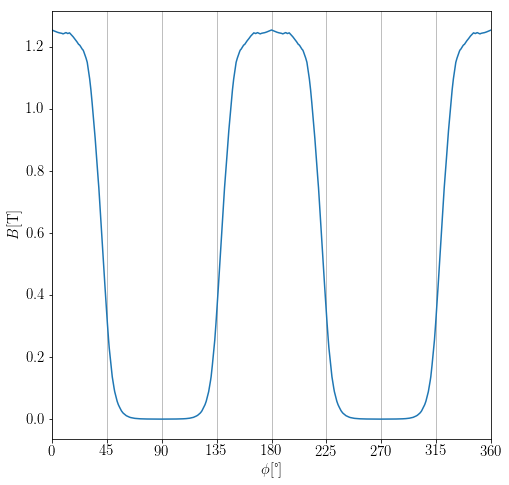

In [10]:
%matplotlib inline


profile_fig, profile_axes = nemplot.create_plot(xlabel=r'$\phi [\si{\degree}]$',
                                               ylabel=r'$B [\si{\tesla}]$')

phi_vector, B_vector = tmm.get_profile_data()

profile_axes.plot(phi_vector,B_vector)
profile_axes.set_xlim(0,np.max(phi_vector))
profile_axes.set_xticks(np.linspace(0,np.max(phi_vector),9))
profile_axes.xaxis.grid(True)

### Magnet profile - comparison between linear and non-linear iron regions

In [11]:
param_dict_linear_5000 = {"R_i": 0.015,
                "R_o": 0.070,
                "h_gap": 0.020,
                "R_s": 0.140,
                "h_fc": 0.010,
                "R_e": 2,
                "n_IV": 3,
                "phi_S_IV": 45,
                "n_II": 3,
                "phi_C_II": 15,
                "phi_S_II": 45,
                "B_rem_II_1": 1.4,
                "B_rem_II_2": 1.4,
                "B_rem_II_3": 1.4,
                "mu_r_II": 1.05,
                "B_rem_IV_1": 1.4,
                "B_rem_IV_2": 1.4,
                "B_rem_IV_3": 1.4,
                "mu_r_IV": 1.05,
              "linear_iron": 1,
              "mu_r_iron": 5e3,
             }

tmpd_linear_5000 = TeslaMaxPreDesign(param_dict_linear_5000)

param_dict_non_linear = param_dict_linear_5000.copy()
param_dict_non_linear["linear_iron"] = 0
tmpd_non_linear = TeslaMaxPreDesign(param_dict_non_linear)

param_dict_linear_1000 = param_dict_linear_5000.copy()
param_dict_linear_1000["mu_r_iron"] = 1e3
tmpd_linear_1000 = TeslaMaxPreDesign(param_dict_linear_1000)



In [12]:
tmm_linear_5000 = TeslaMaxModel(tmpd_linear_5000,alpha_rem_vector,
                               path=teslamax_playground)
tmm_linear_5000.run(verbose=True)

phi_vector_linear_5000, B_vector_linear_5000 = tmm_linear_5000.get_profile_data()


*******************************************
***COMSOL 5.2.1.229 progress output file***
*******************************************
Mon Feb 05 10:28:26 BRST 2018
COMSOL 5.2a (Build: 229) starting in batch mode
Running: C:\Users\fabiofortkamp\code\teslamax\java\TeslaMax.class
           Current Progress:   0 % - Circle 1
Memory: 374/377 575/579
           Current Progress:   8 % - Circle 2
Memory: 376/377 576/579
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 378/378 578/579
           Current Progress:   0 % - Circle 1
Memory: 382/382 582/582
           Current Progress:   8 % - Circle 2
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 383/383 582/582
           Current Progress:   0 % - Cylinder Block - Iron II Wedge 1Q
Memory: 396/396 595/596
           Current Progress:   0 % - Circle 1
Memory: 397/398 596/597
           Current Progress:   1 % - Circle 2

In [13]:
tmm_linear_1000 = TeslaMaxModel(tmpd_linear_1000,alpha_rem_vector,
                               path=teslamax_playground)
tmm_linear_1000.run(verbose=True)

phi_vector_linear_1000, B_vector_linear_1000 = tmm_linear_1000.get_profile_data()


*******************************************
***COMSOL 5.2.1.229 progress output file***
*******************************************
Mon Feb 05 10:28:49 BRST 2018
COMSOL 5.2a (Build: 229) starting in batch mode
Running: C:\Users\fabiofortkamp\code\teslamax\java\TeslaMax.class
           Current Progress:   0 % - Circle 1
Memory: 372/378 589/595
           Current Progress:   8 % - Circle 2
Memory: 380/385 596/602
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 382/385 597/602
           Current Progress:   0 % - Circle 1
Memory: 375/385 589/602
           Current Progress:   8 % - Circle 2
Memory: 376/385 589/602
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
           Current Progress:   0 % - Cylinder Block - Iron II Wedge 1Q
Memory: 404/405 604/605
           Current Progress:   0 % - Circle 1
Memory: 413/413 609/609
           Current Progress:   1 % - Circle 2

In [14]:
tmm_non_linear = TeslaMaxModel(tmpd_non_linear,alpha_rem_vector,
                               path=teslamax_playground)
tmm_non_linear.run(verbose=True)

phi_vector_non_linear, B_vector_non_linear = tmm_non_linear.get_profile_data()


*******************************************
***COMSOL 5.2.1.229 progress output file***
*******************************************
Mon Feb 05 10:29:14 BRST 2018
COMSOL 5.2a (Build: 229) starting in batch mode
Running: C:\Users\fabiofortkamp\code\teslamax\java\TeslaMax.class
           Current Progress:   0 % - Circle 1
Memory: 378/378 598/598
           Current Progress:   8 % - Circle 2
Memory: 376/381 596/601
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 378/381 597/601
           Current Progress:   0 % - Circle 1
Memory: 386/386 605/605
           Current Progress:   8 % - Circle 2
-          Current Progress:  17 % - Difference 1
Memory: 387/387 605/605
---------  Current Progress:  93 % - Resolving domains
Memory: 389/389 607/607
           Current Progress:   0 % - Cylinder Block - Iron II Wedge 1Q
Memory: 408/410 611/621
           Current Progress:   0 % - Circle 1
Memory: 412/413 611/621
           Current Pr

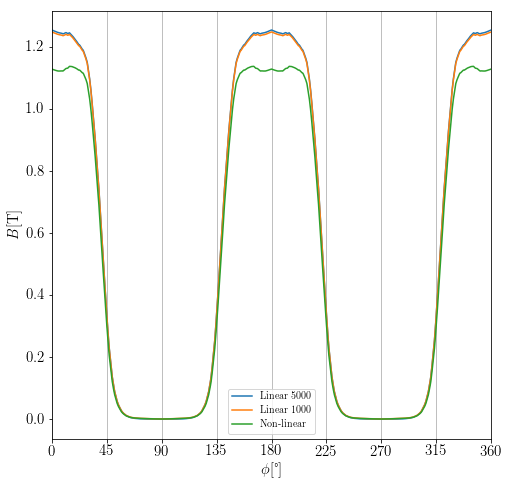

In [15]:
%matplotlib inline

profile_fig, profile_axes = nemplot.create_plot(xlabel=r'$\phi [\si{\degree}]$',
                                               ylabel=r'$B [\si{\tesla}]$')

profile_axes.plot(phi_vector_linear_5000,B_vector_linear_5000,label="Linear 5000")
profile_axes.plot(phi_vector_linear_1000,B_vector_linear_1000,label="Linear 1000")
profile_axes.plot(phi_vector_non_linear,B_vector_non_linear,label="Non-linear")

profile_axes.set_xlim(0,np.max(phi_vector))
profile_axes.set_xticks(np.linspace(0,np.max(phi_vector),9))
profile_axes.xaxis.grid(True)
profile_axes.legend(loc='best')


### Magnet profile - comparison between iron and magnet core

In [16]:
param_dict_magnet = {"R_i": 0.015,
                "R_o": 0.070,
                "h_gap": 0.020,
                "R_s": 0.140,
                "h_fc": 0.020,
                "R_e": 2,
                "n_IV": 3,
                "phi_S_IV": 45,
                "n_II": 2,
                "phi_C_II": 15,
                "phi_S_II": 45,
                 "B_rem_II_1": 1.4,
                "B_rem_II_2": 1.4,
                "B_rem_II_3": 1.4,
                "mu_r_II": 1.05,
                "B_rem_IV_1": 1.4,
                "B_rem_IV_2": 1.4,
                "B_rem_IV_3": 1.4,
                "mu_r_IV": 1.05,
                "linear_iron": 0
             }

alpha_rem_vector_2 = [-45, -45, 15, 45, 75]

tmpd_magnet = TeslaMaxPreDesign(param_dict_magnet)

param_dict_iron = param_dict_magnet.copy()
param_dict_iron["n_II"] = 0
param_dict_iron["phi_C_II"] = 0
param_dict_iron["phi_S_II"] = 0
tmpd_iron = TeslaMaxPreDesign(param_dict_iron)
alpha_rem_vector_2_iron = np.array([15, 45, 75])


In [17]:
tmm_magnet = TeslaMaxModel(tmpd_magnet,alpha_rem_vector_2,
                          path=teslamax_playground)
tmm_magnet.run(verbose=True)
phi_vector_magnet, B_vector_magnet = tmm_magnet.get_profile_data()

*******************************************
***COMSOL 5.2.1.229 progress output file***
*******************************************
Mon Feb 05 10:29:45 BRST 2018
COMSOL 5.2a (Build: 229) starting in batch mode
Running: C:\Users\fabiofortkamp\code\teslamax\java\TeslaMax.class
           Current Progress:   0 % - Circle 1
Memory: 373/373 592/592
           Current Progress:   8 % - Circle 2
Memory: 382/382 601/601
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 384/384 601/601
           Current Progress:   0 % - Circle 1
Memory: 381/384 597/602
           Current Progress:   8 % - Circle 2
-          Current Progress:  17 % - Difference 1
Memory: 382/384 598/602
---------  Current Progress:  93 % - Resolving domains
Memory: 383/384 599/602
           Current Progress:   0 % - Cylinder Block - Iron II Wedge 1Q
Memory: 395/397 597/606
           Current Progress:   0 % - Circle 1
Memory: 401/401 600/606
           Current Pr

In [18]:
tmm_iron = TeslaMaxModel(tmpd_iron,alpha_rem_vector_2_iron,
                          path=teslamax_playground)
tmm_iron.run(verbose=True)
phi_vector_iron, B_vector_iron = tmm_iron.get_profile_data()

*******************************************
***COMSOL 5.2.1.229 progress output file***
*******************************************
Mon Feb 05 10:30:08 BRST 2018
COMSOL 5.2a (Build: 229) starting in batch mode
Running: C:\Users\fabiofortkamp\code\teslamax\java\TeslaMax.class
           Current Progress:   0 % - Circle 1
Memory: 386/387 606/607
           Current Progress:   8 % - Circle 2
Memory: 398/398 617/617
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 400/400 618/618
           Current Progress:   0 % - Circle 1
Memory: 394/407 611/626
           Current Progress:   8 % - Circle 2
-          Current Progress:  17 % - Difference 1
---------  Current Progress:  93 % - Resolving domains
Memory: 394/407 612/626
           Current Progress:   0 % - Cylinder Block - Iron II
Memory: 412/412 619/626
           Current Progress:   0 % - Circle 1
Memory: 411/413 616/626
           Current Progress:   1 % - Circle 2
Memory: 

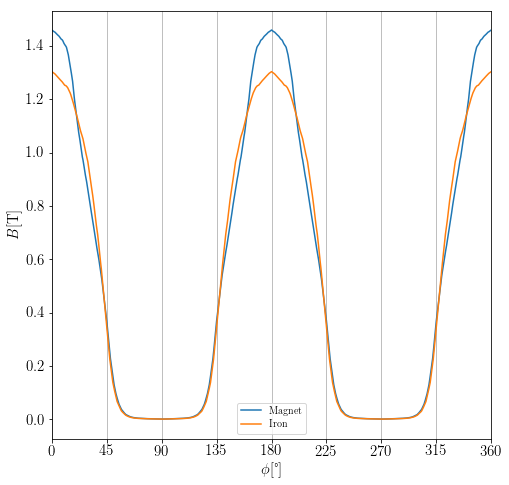

In [19]:
%matplotlib inline


profile_fig, profile_axes = nemplot.create_plot(xlabel=r'$\phi [\si{\degree}]$',
                                               ylabel=r'$B [\si{\tesla}]$')

profile_axes.plot(phi_vector_magnet,B_vector_magnet,label="Magnet")
profile_axes.plot(phi_vector_iron,B_vector_iron,label="Iron")
profile_axes.set_xlim(0,np.max(phi_vector))
profile_axes.set_xticks(np.linspace(0,np.max(phi_vector),9))
profile_axes.xaxis.grid(True)
profile_axes.legend(loc='best')
